<a href="https://colab.research.google.com/github/Ayman-queen/data-science-internship-tasks/blob/main/Predicting%20Insurance%20Claim%20Amounts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ MAE: 8079.38
✅ RMSE: 8079.38


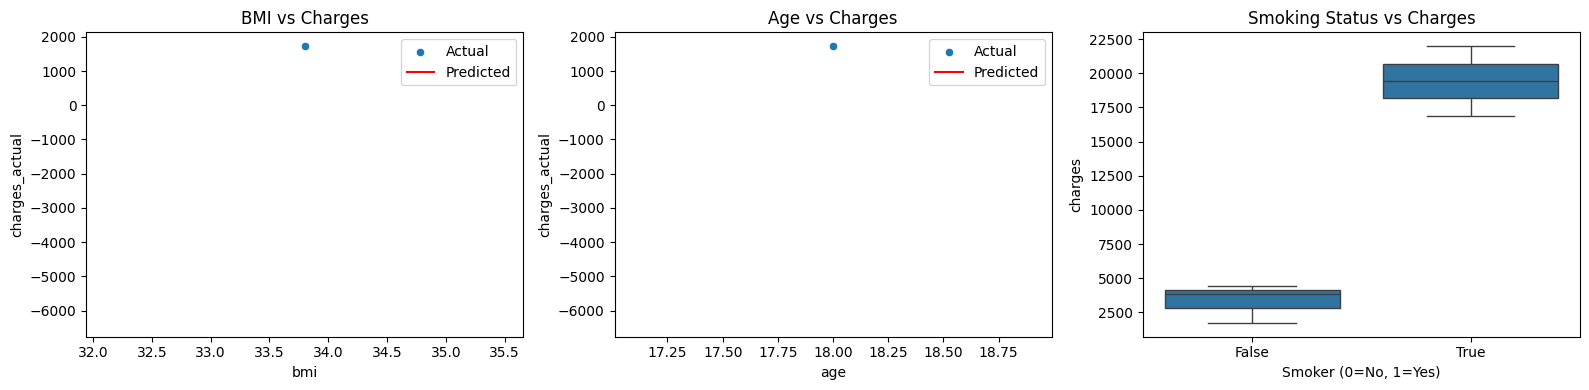

    bmi  age  Actual Charges  Predicted Charges
1  33.8   18            1725           -6354.38


In [8]:
# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ✅ Step 2: Sample Insurance Dataset (since file not uploaded)
data = {
    'age': [19, 18, 28, 45, 33],
    'bmi': [27.9, 33.8, 33.0, 30.5, 29.5],
    'children': [0, 1, 3, 2, 0],
    'charges': [16884, 1725, 4449, 21984, 3866],
    'sex': ['female', 'male', 'male', 'female', 'male'],
    'smoker': ['yes', 'no', 'no', 'yes', 'no'],
    'region': ['southwest', 'southeast', 'southeast', 'northwest', 'northeast']
}
df = pd.DataFrame(data)

# ✅ Step 3: Preprocess with One-Hot Encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# ✅ Step 4: Define Features and Target
X = df.drop('charges', axis=1)
y = df['charges']

# ✅ Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 6: Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# ✅ Step 7: Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"✅ MAE: {mae:.2f}")
print(f"✅ RMSE: {rmse:.2f}")

# ✅ Step 8: Visualize Results
test_data = X_test.copy()
test_data['charges_actual'] = y_test
test_data['charges_predicted'] = y_pred

plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(x=test_data['bmi'], y=test_data['charges_actual'], label='Actual')
sns.lineplot(x=test_data['bmi'], y=test_data['charges_predicted'], color='red', label='Predicted')
plt.title('BMI vs Charges')

plt.subplot(1, 3, 2)
sns.scatterplot(x=test_data['age'], y=test_data['charges_actual'], label='Actual')
sns.lineplot(x=test_data['age'], y=test_data['charges_predicted'], color='red', label='Predicted')
plt.title('Age vs Charges')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['smoker_yes'], y=df['charges'])
plt.title('Smoking Status vs Charges')
plt.xlabel('Smoker (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

# ✅ Step 9: Show Detailed Prediction Table
result_df = test_data[['bmi', 'age']].copy()
result_df['Actual Charges'] = test_data['charges_actual']
result_df['Predicted Charges'] = test_data['charges_predicted'].round(2)

# Show all rows
pd.set_option('display.max_rows', None)
print(result_df)